# Linear regression in diabetes dataset

Let's explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)).

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes (keys) of `diabetes`. Note that the `load_diabetes` function does not return dataframes. It returns you a Python dictionary.

In [3]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [7]:
diabetes['feature_names']

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

#### The next step is to read the description of the dataset. 

Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable. Read the data description carefully to fully understand what each column represents.

*Hint: If your output is ill-formatted by displaying linebreaks as `\n`, it means you are not using the `print` function.*

In [8]:
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

#### Based on the data description, answer the following questions:

1. How many attributes are there in the data? What do they mean?

1. What is the relation between `diabetes['data']` and `diabetes['target']`?

1. How many records are there in the data?

* 10 variables, podemos ver la info en diabetes['DESCR']
* En 'data' tenemos las variables predictoras, en 'target' la variable target, buscaremos correlación de cada una de ellas con target, mientras que también buscaremos evitar la multicolinealdiad (dependencia entre variables predictoras).
* 442 registros

#### Now explore what are contained in the *data* portion as well as the *target* portion of `diabetes`. 

Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). Inspect the shape of `data` and `target`. Confirm they are consistent with the data description.

In [9]:
print(diabetes['data'].shape)
print(diabetes['target'].shape)

(442, 10)
(442,)


## Building a regression model

The data have already been split to predictor (*data*) and response (*target*) variables. Given this information, we'll apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset.

#### In the cell below, import the `linear_model` class from `sklearn`. 

In [10]:
from sklearn.linear_model import LinearRegression

#### Create a new instance of the linear regression model and assign the new instance to the variable `diabetes_model`.

In [11]:
diabetes_model = LinearRegression()

#### Next, let's split the training and test data.

Define `diabetes_data_train`, `diabetes_target_train`, `diabetes_data_test`, and `diabetes_target_test`. Use the last 20 records for the test data and the rest for the training data.

In [15]:
from sklearn.model_selection import train_test_split

diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(diabetes['data'], diabetes['target'], test_size=20, shuffle=False)

In [16]:
# X_train
diabetes_data_train = diabetes['data'][:-20,]
# X_test
diabetes_data_test = diabetes['data'][-20:,]

# y_train
diabetes_target_train = diabetes['target'][:-20]
# y_test
diabetes_target_test = diabetes['target'][-20:]

Explore your dataset before training a model

In [17]:
print(diabetes_data_train.shape)
print(diabetes_data_test.shape)
print(diabetes_target_train.shape)
print(diabetes_target_test.shape)

(422, 10)
(20, 10)
(422,)
(20,)


In [21]:
df = pd.DataFrame(diabetes['data'], columns= diabetes['feature_names'])
df['target'] = diabetes['target']
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [23]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.639623e-16,1.309912e-16,-8.013951e-16,1.289818e-16,-9.042540e-17,1.301121e-16,-4.563971e-16,3.863174e-16,-3.848103e-16,-3.398488e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


c:\Users\Miguel Angel\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


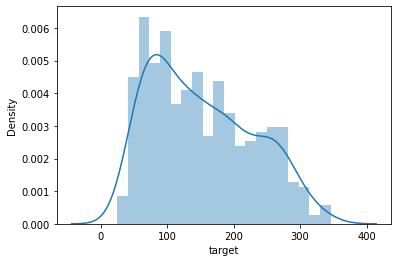

In [26]:
import seaborn as sns

sns.distplot(df['target'], bins=20);

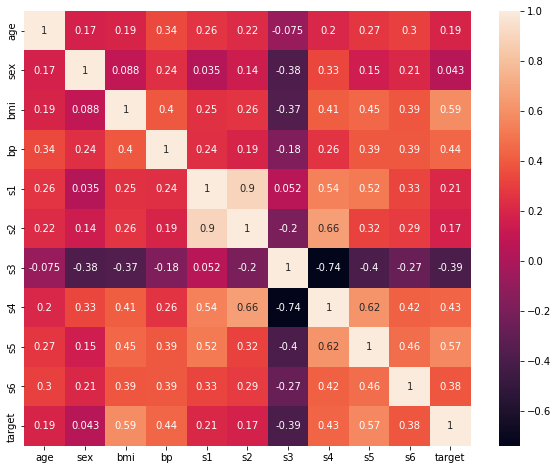

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

Fit the training data and target to `diabetes_model`. Print the *intercept* and *coefficients* of the model.

In [30]:
diabetes_model.fit(diabetes_data_train, diabetes_target_train)

LinearRegression()

#### Inspecting the results

From the outputs you should have seen:

- The intercept is a float number.
- The coefficients are an array containing 10 float numbers.

This is the linear regression model fitted to your training dataset.

#### Using your fitted linear regression model, predict the *y* of `diabetes_data_test`.

y = a + bx1 + cx2...

In [33]:
print(len(diabetes_model.coef_))
print(diabetes_model.coef_)

10
[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [34]:
print(diabetes_model.intercept_)

152.76430691633442


y = 152.76 + 0.3*x1 - 237 * x2...

In [36]:
df_coef = pd.DataFrame(diabetes_model.coef_, diabetes['feature_names'], columns=['Coeff'])
df_coef.sort_values('Coeff', ascending=False)

,Coeff
s5,743.519617
bmi,510.530605
s2,492.814588
bp,327.736980
s4,184.606489
s3,102.848452
s6,76.095172
age,0.303500
sex,-237.639315
s1,-814.131709


#### Print your `diabetes_target_test` and compare with the prediction. 

In [40]:
predictions = diabetes_model.predict(diabetes_data_test)
predictions

array([197.61846908, 155.43979328, 172.88665147, 111.53537279,
       164.80054784, 131.06954875, 259.12237761, 100.47935157,
       117.0601052 , 124.30503555, 218.36632793,  61.19831284,
       132.25046751, 120.3332925 ,  52.54458691, 194.03798088,
       102.57139702, 123.56604987, 211.0346317 ,  52.60335674])

In [41]:
df_eval = pd.DataFrame({"pred":predictions, "real_value":diabetes_target_test})
df_eval

,pred,real_value
0,197.618469,233.0
1,155.439793,91.0
2,172.886651,111.0
3,111.535373,152.0
4,164.800548,120.0
5,131.069549,67.0
6,259.122378,310.0
7,100.479352,94.0
8,117.060105,183.0
9,124.305036,66.0


#### Is `diabetes_target_test` exactly the same as the model prediction?

In [42]:
print(diabetes_target_test)

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.]


In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("MAE:", mean_absolute_error(diabetes_target_test, predictions))
print("MAPE:", mean_absolute_percentage_error(diabetes_target_test, predictions))
print("MSE:", mean_squared_error(diabetes_target_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(diabetes_target_test, predictions)))

MAE: 36.61017556715884
MAPE: 0.3930935133924728
MSE: 2004.5676026898211
RMSE: 44.77239777686495


## Extra: Interpreta tu modelo ¿Cuáles son las variables más importantes?

In [47]:
df_coef.sort_values("Coeff", ascending=False)

,Coeff
s5,743.519617
bmi,510.530605
s2,492.814588
bp,327.736980
s4,184.606489
s3,102.848452
s6,76.095172
age,0.303500
sex,-237.639315
s1,-814.131709


In [52]:
# np.mean(df['age'])
np.std(df['age'])

0.04756514941545118

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(diabetes_data_train)
diabetes_data_train_scal = scaler.transform(diabetes_data_train)

diabetes_model_v2 = LinearRegression()
diabetes_model_v2.fit(diabetes_data_train_scal, diabetes_target_train)

LinearRegression()

In [58]:
df_coeff_v2 = pd.DataFrame(diabetes_model_v2.coef_, diabetes['feature_names'], columns=['Coeff'])
df_coeff_v2['Coeff'] = abs(df_coeff_v2['Coeff'])
df_coeff_v2.sort_values("Coeff", ascending=False)

,Coeff
s1,38.635011
s5,35.645022
bmi,24.295322
s2,23.385184
bp,15.599198
sex,11.301140
s4,8.799507
s3,4.818334
s6,3.606549
age,0.014507


## Iteramos con un nuevo modelo ¿Podemos mejorar el anterior?

In [59]:
X = df[['s1','s5','bmi','bp']]
y = df['target']

In [60]:
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(X, y, test_size=20, shuffle=False)

In [61]:
diabetes_model_v3 = LinearRegression()
diabetes_model_v3.fit(diabetes_data_train, diabetes_target_train)

predictions = diabetes_model_v3.predict(diabetes_data_test)

print("MAE:", mean_absolute_error(diabetes_target_test, predictions))
print("MAPE:", mean_absolute_percentage_error(diabetes_target_test, predictions))
print("MSE:", mean_squared_error(diabetes_target_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(diabetes_target_test, predictions)))

MAE: 35.519663104008586
MAPE: 0.3885433894684346
MSE: 1990.0348259979553
RMSE: 44.60980638825902


In [63]:
X = df[['s1','s5']]
y = df['target']

In [64]:
diabetes_data_train, diabetes_data_test, diabetes_target_train, diabetes_target_test = train_test_split(X, y, test_size=20, shuffle=False)

In [65]:
diabetes_model_v4 = LinearRegression()
diabetes_model_v4.fit(diabetes_data_train, diabetes_target_train)

predictions = diabetes_model_v4.predict(diabetes_data_test)

print("MAE:", mean_absolute_error(diabetes_target_test, predictions))
print("MAPE:", mean_absolute_percentage_error(diabetes_target_test, predictions))
print("MSE:", mean_squared_error(diabetes_target_test, predictions))
print("RMSE:", np.sqrt(mean_squared_error(diabetes_target_test, predictions)))

MAE: 45.71504642369657
MAPE: 0.5176894004914765
MSE: 2733.8719672213483
RMSE: 52.28644152379609
